In [1]:
import torch 
import torch.nn as nn
import torchvision

In [2]:
torch.__version__

'1.9.1'

In [3]:
from simgd.deepnets1m.graph import Graph, GraphBatch
from simgd.ghn.nn import GHN

In [13]:
model = nn.Sequential(
        nn.Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(32*32,64),
        nn.ReLU(),
        nn.Linear(64,10)
)

#model = nn.Sequential(
#        nn.Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#        nn.ReLU(),
#        nn.Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#        nn.ReLU(),
#        nn.Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#        nn.ReLU(),
#        nn.Flatten(),
#        nn.Linear(32*32,10)
#)
model.expected_image_sz = (32,32)

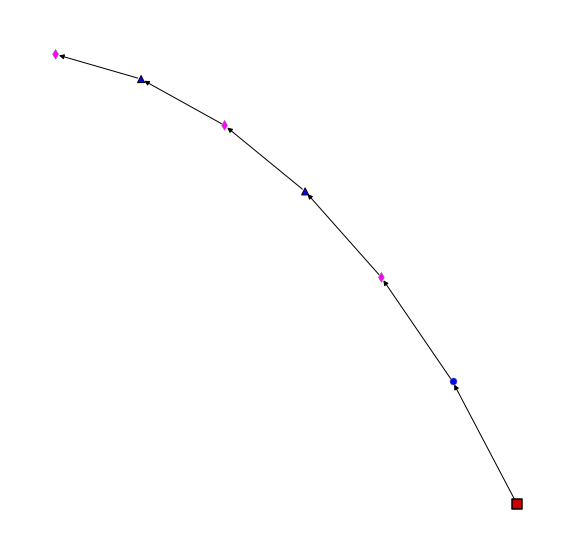

In [15]:
g = Graph(model)
g.visualize()
#gb = GraphBatch([g])
g.edges = torch.cat([g.edges,torch.zeros((g.edges.size(0),1))],dim=1).long()
g.node_feat = torch.cat([g.node_feat,torch.zeros((g.node_feat.size(0),1))],dim=1)

In [7]:
ghn = GHN([1024,1024,5,5],10)

In [16]:
outs = ghn(model,g)

In [17]:
for o in outs:
    print(o.shape)

torch.Size([1, 3, 3, 3])
torch.Size([1])
torch.Size([64, 1024])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [ ]:
optim = torch.optim.SGD(model.parameters(),lr=0)

In [ ]:
loss = torch.nn.CrossEntropyLoss()(model(torch.rand((1,3,32,32))),torch.rand((1,10)).argmax(1))
loss.backward()

In [ ]:
for p in model.parameters():
    print(p.grad.shape)

torch.Size([3, 3, 3, 3])
torch.Size([3])
torch.Size([3, 3, 3, 3])
torch.Size([3])
torch.Size([1, 3, 3, 3])
torch.Size([1])
torch.Size([10, 1024])
torch.Size([10])


In [ ]:
from src.ghn.encoder import MLPEncoder
from src.ghn.decoder import MLPDecoder

In [ ]:
conv_enc = MLPEncoder([3, 3, 3, 3])
conv_dec = MLPDecoder([3, 3, 3, 3])
bias_enc = nn.Linear(3,32)
bias_dec = nn.Linear(32,3)
linear_enc = MLPEncoder([1024,1024])
linear_dec = MLPDecoder([1024,1024])

In [ ]:
model.state_dict()["2.weight"].ndimension()

4

In [ ]:
var = conv_enc(model.state_dict()["2.weight"].flatten())
var.shape

torch.Size([32])

In [ ]:
conv_dec(var).shape

torch.Size([3, 3, 3, 3])

In [ ]:
g.node_params

['input',
 '0.weight',
 '0.bias',
 '2.weight',
 '2.bias',
 '4.weight',
 '4.bias',
 '7.weight',
 '7.bias']

In [ ]:
g.node_info

[[(1, '0.weight', 'conv', torch.Size([3, 3, 3, 3]), False, False),
  (2, '0.bias', 'bias', torch.Size([3]), False, False),
  (3, '2.weight', 'conv', torch.Size([3, 3, 3, 3]), False, False),
  (4, '2.bias', 'bias', torch.Size([3]), False, False),
  (5, '4.weight', 'conv', torch.Size([1, 3, 3, 3]), False, False),
  (6, '4.bias', 'bias', torch.Size([1]), False, False),
  (7, '7.weight', 'conv', torch.Size([10, 1024]), True, False),
  (8, '7.bias', 'bias', torch.Size([10]), False, True)]]

In [ ]:
g._Adj.shape

torch.Size([9, 9])

In [ ]:
len(g._nodes)

9

In [ ]:
torch.zeros((2,3)).size(0)

2